# 🔥Introduction to convolutional neural network and computer vision with TensorFlow

Computer vision is a practice of writing algorithms which can discover patterns in visual data. Such as a camera of self-driving car recognizing the car in front.

## Get the data
The images we are working with is Food101 dataset (101 different classes of food).

However we've modified it to ony use two classes (pizza🍕 & steak🥩).

>🔑 **Note :** We start with smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-09-06 06:36:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  60.8MB/s    in 1.7s    

2024-09-06 06:36:27 (60.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision.. this usually means visualizing many samples of data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the sub_dir
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  # show the shape of the image
  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


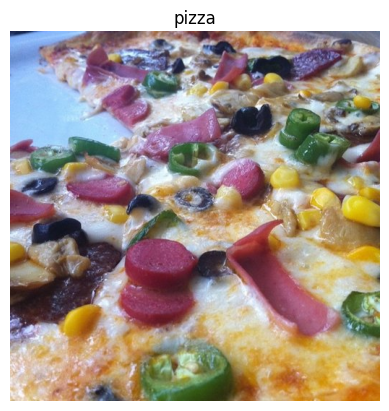

In [ ]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")
img;

In [ ]:
# View the image shape
img.shape # returns width, height and colour channels

(512, 512, 3)

>🔑 **Note :** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

## An end-to-end example
Let's build a CNN to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN model to find patterns in our images
* Compile our CNN model
* Fit the CNN to our training data

In [ ]:
 # Create train and test data generators and rescale the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, validation_data=valid_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.6658 - loss: 0.6006 - val_accuracy: 0.8120 - val_loss: 0.4274
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.7838 - loss: 0.4475 - val_accuracy: 0.8460 - val_loss: 0.3527
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8392 - loss: 0.3913 - val_accuracy: 0.8080 - val_loss: 0.4213
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8217 - loss: 0.4014 - val_accuracy: 0.8720 - val_loss: 0.3441
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8597 - loss: 0.3680 - val_accuracy: 0.8700 - val_loss: 0.3089


> 🔑 **Note :** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to runtim -> change runtime type -> hardware accelerator -> GPU.

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before
Let's replicate the model we build in classification section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.22893&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false):


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Comile the model
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, validation_data=valid_data, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.5886 - loss: 2.6487 - val_accuracy: 0.7580 - val_loss: 0.5632
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.7030 - loss: 0.7608 - val_accuracy: 0.7840 - val_loss: 0.4748
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.7693 - loss: 0.5114 - val_accuracy: 0.7700 - val_loss: 0.4833
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.7868 - loss: 0.4722 - val_accuracy: 0.7640 - val_loss: 0.4765
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.8022 - loss: 0.4492 - val_accuracy: 0.6920 - val_loss: 0.6132


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more params than our CNN (model_1), model_2 performs terribly... Let's try to improve it

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (Same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 471ms/step - accuracy: 0.5310 - loss: 7.2638 - val_accuracy: 0.5960 - val_loss: 1.0815
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 496ms/step - accuracy: 0.6564 - loss: 0.9510 - val_accuracy: 0.7060 - val_loss: 0.6329
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 468ms/step - accuracy: 0.7014 - loss: 0.7089 - val_accuracy: 0.7740 - val_loss: 0.4675
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 472ms/step - accuracy: 0.7506 - loss: 0.5969 - val_accuracy: 0.7760 - val_loss: 0.4860
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 467ms/step - accuracy: 0.7947 - loss: 0.4852 - val_accuracy: 0.6440 - val_loss: 0.6350


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for the model, the main steps here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Compile and fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat untill satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


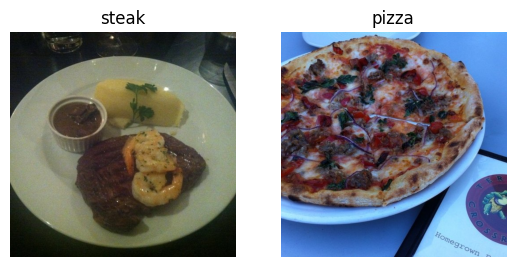

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define our directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than took at all ~10,000 images at one time, a model migtht only look at 32 at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... (refer Yann lecun)

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,    # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary",    # Type of data you're working with
                                               batch_size=32)          # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = next(train_data) # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first image
images[0], images[0].shape

(array([[[0.56078434, 0.63529414, 0.79215693],
         [0.5647059 , 0.6392157 , 0.7960785 ],
         [0.5647059 , 0.6392157 , 0.80392164],
         ...,
         [0.07843138, 0.08235294, 0.05882353],
         [0.08235294, 0.08235294, 0.07450981],
         [0.09803922, 0.09803922, 0.09803922]],
 
        [[0.5647059 , 0.6392157 , 0.7960785 ],
         [0.5568628 , 0.6313726 , 0.7960785 ],
         [0.5568628 , 0.6313726 , 0.7960785 ],
         ...,
         [0.09803922, 0.10196079, 0.07058824],
         [0.0627451 , 0.06666667, 0.04705883],
         [0.04313726, 0.04313726, 0.03529412]],
 
        [[0.5686275 , 0.6431373 , 0.8078432 ],
         [0.5647059 , 0.6392157 , 0.80392164],
         [0.5647059 , 0.6392157 , 0.8078432 ],
         ...,
         [0.07450981, 0.07843138, 0.04705883],
         [0.15686275, 0.16078432, 0.13725491],
         [0.21568629, 0.21960786, 0.20000002]],
 
        ...,
 
        [[0.3921569 , 0.34901962, 0.22352943],
         [0.39607847, 0.3529412 , 0.23529

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machin learning experiment and then as you keep experimenting, you try to beat the baseline

In [ ]:
# Make the creatig of our model a little easier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create the model (this will be our baseline)
model_4 = Sequential([
    Conv2D(filters=10,                 # Filter is the number of sliding windows going across an input
           kernel_size=3,              # Size of the sliding window going across the input
           strides=1,                  # size of the step the sliding window takes across an input
           padding="valid",            # if "same", output shape is same as input shape
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")     # output layer (working with binary classification)
])

### 4. Compile and fit the model

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.5873 - loss: 0.9693 - val_accuracy: 0.7800 - val_loss: 0.4690
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8516 - loss: 0.3647 - val_accuracy: 0.8200 - val_loss: 0.4033
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9517 - loss: 0.1816 - val_accuracy: 0.7860 - val_loss: 0.4558
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9912 - loss: 0.0618 - val_accuracy: 0.7960 - val_loss: 0.5008
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.9997 - loss: 0.0112 - val_accuracy: 0.7960 - val_loss: 0.5514


### Evaluating our model

<Axes: >

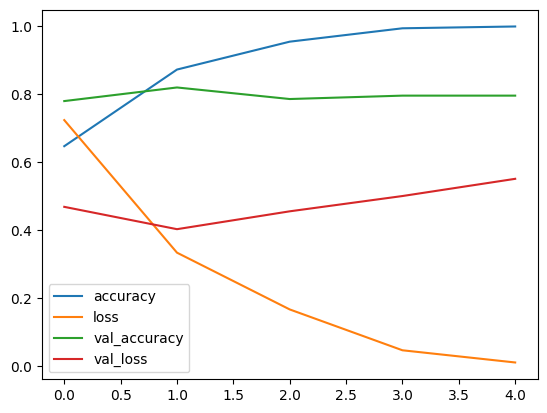

In [ ]:
# Plot the accuracy/loss curve
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curve(history):
  """
  returns seperate loss curve for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

> 🔑**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset.

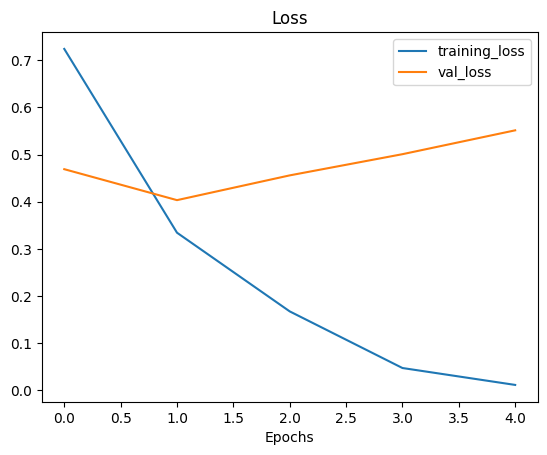

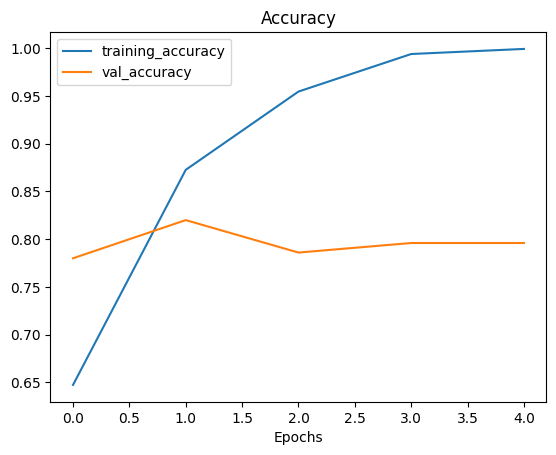

In [ ]:
#Check out the loss and accuracy of model_4
plot_loss_curve(history_4)

### Adjust the model's parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layer
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data, validation_data=test_data, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5834 - loss: 0.6717 - val_accuracy: 0.7500 - val_loss: 0.5374
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7605 - loss: 0.5105 - val_accuracy: 0.8360 - val_loss: 0.3958
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8185 - loss: 0.4202 - val_accuracy: 0.8620 - val_loss: 0.3484
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7857 - loss: 0.4415 - val_accuracy: 0.8600 - val_loss: 0.3397
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8476 - loss: 0.3597 - val_accuracy: 0.8680 - val_loss: 0.3355


In [ ]:
# Get the summary of our model with max pooling
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

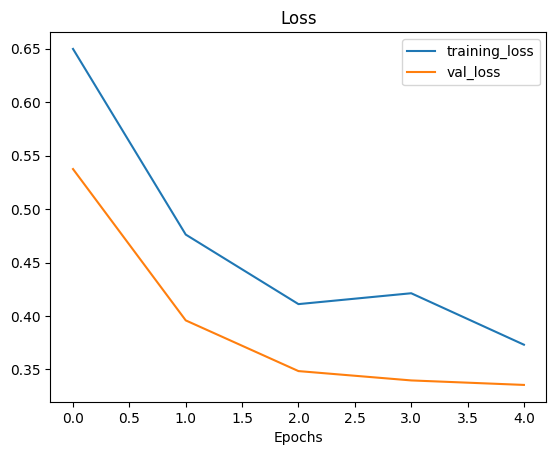

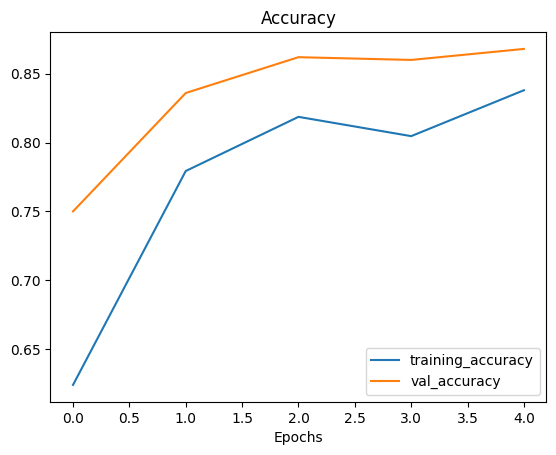

In [ ]:
# Plt loss curves
plot_loss_curve(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create image data generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                  target_size=(224, 224),
                                                                  class_mode="binary",
                                                                  batch_size=32,
                                                                  shuffle=False)  # For demonstration purpose only

# Import data without augmentation from training directory
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32,
                                               shuffle=False)  # For demonstration purpose only

# Create non-augmentad test data batches
print("Non-augmented training data:")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on training data. Using `ImageDataGenerator` built-in data augmentation parameters our image are left as they are in the directories but are modified as they are loaded in the model.

Finally... Let's visualize some augmented data

In [ ]:
# Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # Note: labels aren't augmented, only images are

Showing image number: {16}


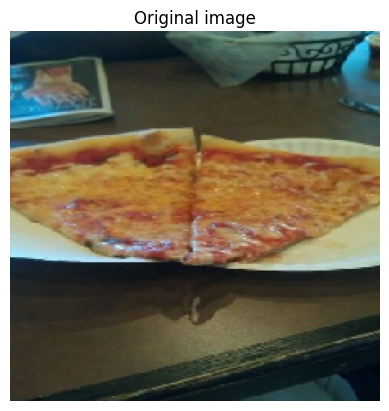

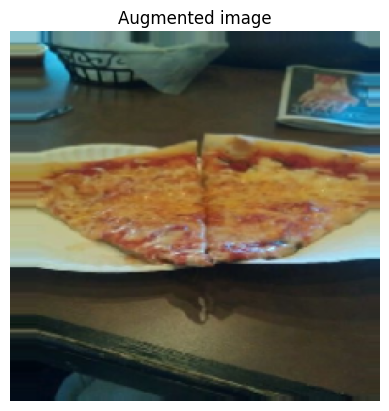

In [ ]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32) # batch-size = 32
print("Showing image number:", {random_number})
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

Now we've seen what augmented training data look like, let's build a model and see how it learns on augmented data

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Fit the model on augmented training data
history_6 = model_6.fit(train_data_augmented, validation_data=test_data, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.3801 - loss: 0.7597 - val_accuracy: 0.5220 - val_loss: 0.6903
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5116 - loss: 0.6902 - val_accuracy: 0.5240 - val_loss: 0.6803
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5628 - loss: 0.6866 - val_accuracy: 0.5680 - val_loss: 0.6558
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4856 - loss: 0.6891 - val_accuracy: 0.6220 - val_loss: 0.6730
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6391 - loss: 0.6683 - val_accuracy: 0.5000 - val_loss: 0.6739


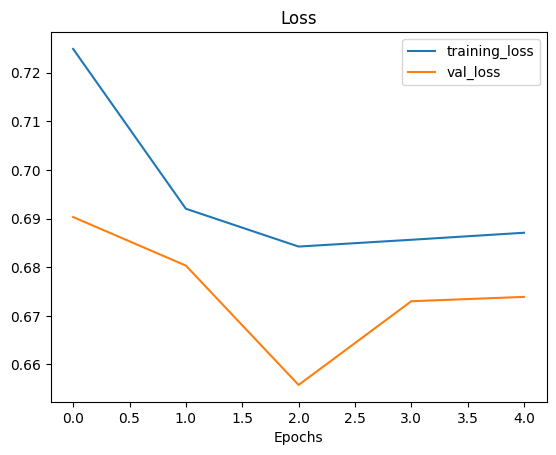

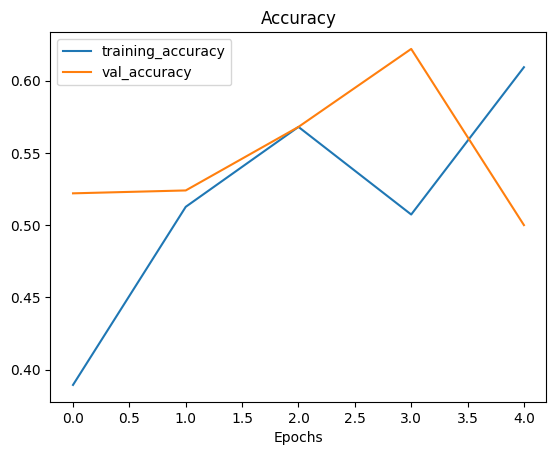

In [ ]:
# Check our model training curves
plot_loss_curve(history_6)

Let's shuffle our train_data_augmented and train another model (the same as before) on it and see what happens

In [ ]:
# Import data and augment it from training directory and shuffle it
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True,
                                                                            )

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Fit the model on shuffled augmented data
history_7 = model_7.fit(train_data_augmented_shuffled, validation_data=test_data, epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.5701 - loss: 0.6771 - val_accuracy: 0.8100 - val_loss: 0.4706
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7409 - loss: 0.5576 - val_accuracy: 0.8500 - val_loss: 0.3848
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7427 - loss: 0.5098 - val_accuracy: 0.8540 - val_loss: 0.3691
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7542 - loss: 0.5112 - val_accuracy: 0.8620 - val_loss: 0.3563
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7820 - loss: 0.4707 - val_accuracy: 0.8440 - val_loss: 0.3574


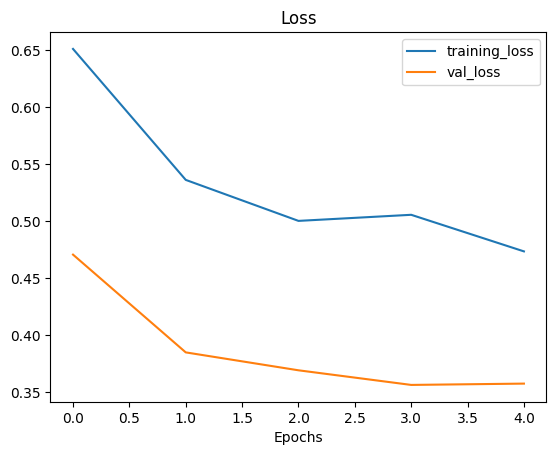

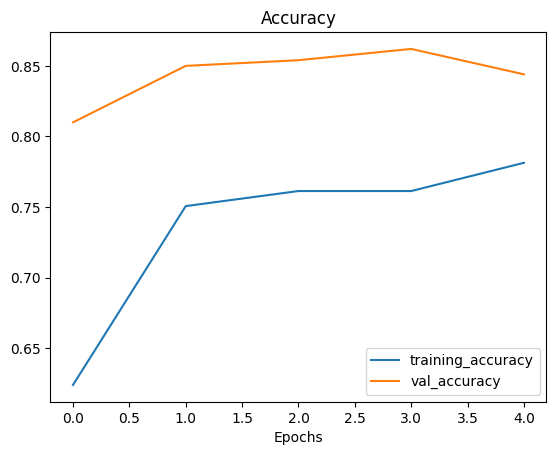

In [ ]:
# Plot loss curves
plot_loss_curve(history_7)

> 🔑**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide range of images.

### 7. Repeat untill satified

Since we've already beaten our baseline, there are few things we can try to continue to improve our model.

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers).
* Increase the number of filters in each `Conv2D` layer (e.g. from 10 to 32 even 64).
* Train for longer (more epochs)
* Find the ideal learning rate
* Give more data (Give the model more oppurtunity to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

> 🛠️ **Practice:** Recreate the model_1 and see how it performs on shuffled augmented training data.

In [ ]:
# Create the model
model_8 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled, validation_data=test_data, epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 335s 7s/step - accuracy: 0.5448 - loss: 0.7219 - val_accuracy: 0.7840 - val_loss: 0.4575
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 374s 7s/step - accuracy: 0.7590 - loss: 0.5052 - val_accuracy: 0.8560 - val_loss: 0.3515
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 326s 7s/step - accuracy: 0.7600 - loss: 0.5092 - val_accuracy: 0.8700 - val_loss: 0.3676
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 325s 7s/step - accuracy: 0.7802 - loss: 0.4818 - val_accuracy: 0.8520 - val_loss: 0.3296
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 326s 7s/step - accuracy: 0.7836 - loss: 0.4924 - val_accuracy: 0.8820 - val_loss: 0.3247


## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


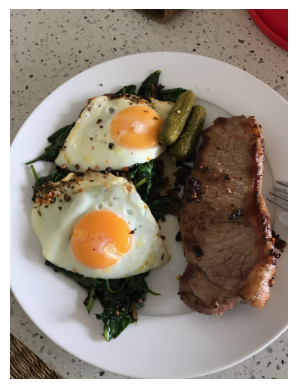

In [ ]:
# View our example image
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important to make sure the custom data is the same shape as the data your model was trained on.

In [ ]:
# Create a function to import and resize the image that can be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in image
  img = tf.io.read_file(filename)
  # Decode the read file to tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 & 1)
  img = img/255.

  return img

In [ ]:
# Load in and preprocess our image
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Looks like our custom image is being put through our model, however, it currently outputs a probability. Wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding off the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


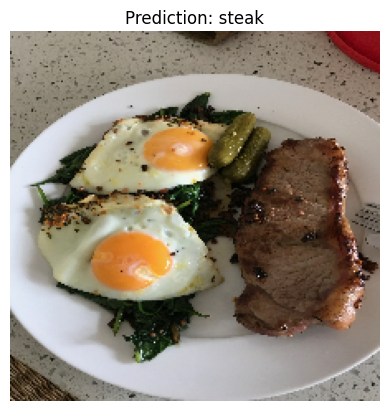

In [ ]:
# Test our model with a custom image
pred_and_plot(model_8, "03-steak.jpeg")

Our model works!!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


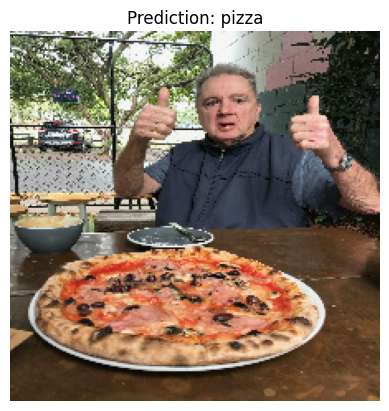

In [ ]:
# Download another test custom image and make a prediction on it
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class image classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat untill satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-09-06 13:23:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  50.4MB/s    in 5.9s    

2024-09-06 13:23:26 (84.2 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


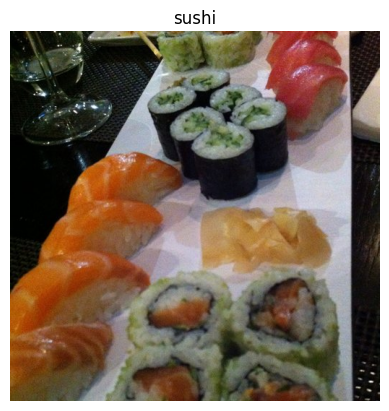

In [ ]:
# Visualize, Visualize, Visualize
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

## 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create train and test data generators and rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

We've been talking a lot about CNN explainer website... How about we just take their model and uses for our problem.

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## 4. Fit the model

In [90]:
# Fit the model
history_9 = model_9.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.1625 - loss: 2.3850 - val_accuracy: 0.3108 - val_loss: 1.9743
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.3234 - loss: 1.9332 - val_accuracy: 0.3660 - val_loss: 1.8319
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - accuracy: 0.4064 - loss: 1.7348 - val_accuracy: 0.3588 - val_loss: 1.8497
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.5131 - loss: 1.4668 - val_accuracy: 0.3508 - val_loss: 1.9127
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 580s 2s/step - accuracy: 0.6741 - loss: 1.0237 - val_accuracy: 0.3244 - val_loss: 2.2851


## 5. Evaluate the model

In [92]:
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 64s 806ms/step - accuracy: 0.3329 - loss: 2.2414


[2.285127639770508, 0.32440000772476196]

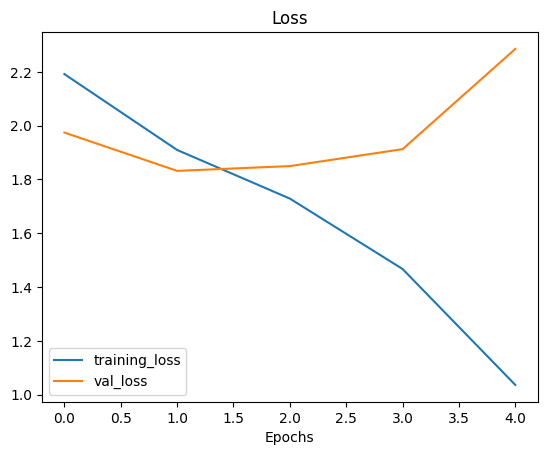

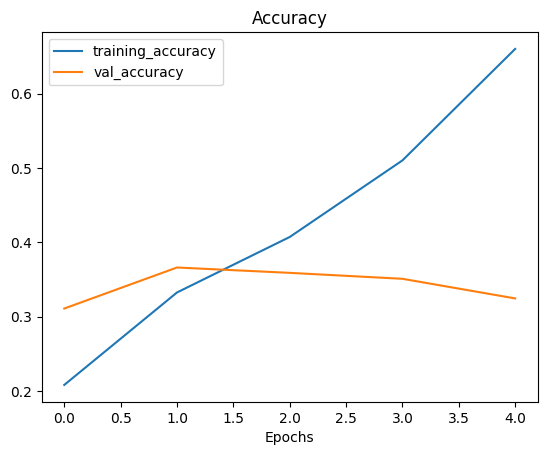

In [93]:
# Check out the model's loss curves on 10 classes
plot_loss_curve(history_9)


What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on training data but fails to generalize on unseen data and performs poorly on the test dataset

## 6. Adjust the model hyperparameters (to beat baseline/reduce overfitting)

Due to its performace on training data, it's clear our model is learning something...

However, it's not generalizing well on testing data.

So let's try and fix overfitting by...
1. **Get more data -** Having more data gives a model more oppurtunity to learn diverse patterns...
2. **Simplify the model -** if our current model is overfitting the data, it may be too complicated of a model, one way to simplify the model is to reduce number of layers or reduce number of hidden units in a layer.
3. **Data augmentation -** it manipulates training data in such a way to add more diversity to it (without altering original data).
4. **Use transfer learning**

### How about we try and simplify the model first


In [95]:
# Let's try to remove 2 convolutional layer
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_10.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data, validation_data=test_data, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.1724 - loss: 2.2101 - val_accuracy: 0.3136 - val_loss: 1.9490
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.3945 - loss: 1.7676 - val_accuracy: 0.3500 - val_loss: 1.8521
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.5339 - loss: 1.4230 - val_accuracy: 0.3408 - val_loss: 1.9369
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.6920 - loss: 1.0037 - val_accuracy: 0.3332 - val_loss: 2.0517
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.8316 - loss: 0.6016 - val_accuracy: 0.3200 - val_loss: 2.4028


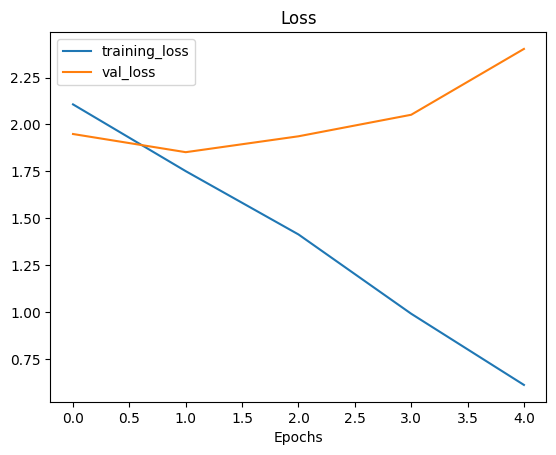

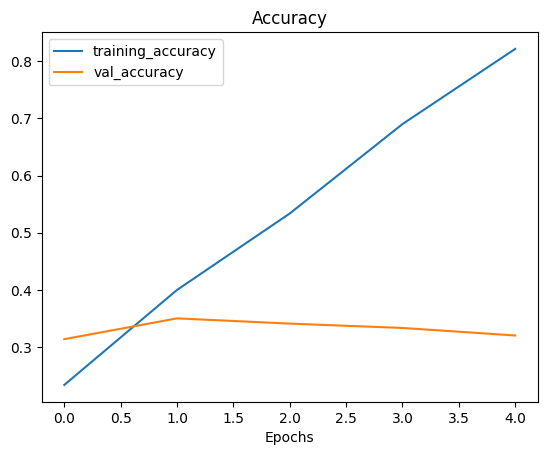

In [96]:
# Plot the loss curves
plot_loss_curve(history_10)

In [97]:
model_10.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

In [98]:
model_9.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

Looks like our "simplifying the model" doesn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

In [100]:
# Create an augmentede data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="categorical",
                                                                   batch_size=32)

Found 7500 images belonging to 10 classes.


In [101]:
# Let's create another model (but this time we'll fit it on augmented data)
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using the same step as previous models)
model_11.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [102]:
model_11.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# Fit the model on augmented data
history_11 = model_11.fit(train_data_augmented, validation_data=test_data, epochs=5)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 662s 3s/step - accuracy: 0.1429 - loss: 2.2621 - val_accuracy: 0.2028 - val_loss: 2.1498
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 684s 3s/step - accuracy: 0.1985 - loss: 2.1692 - val_accuracy: 0.2600 - val_loss: 2.0336
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 714s 3s/step - accuracy: 0.2449 - loss: 2.0882 - val_accuracy: 0.2660 - val_loss: 2.0123
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 670s 3s/step - accuracy: 0.2755 - loss: 2.0579 - val_accuracy: 0.3244 - val_loss: 1.9385
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 675s 3s/step - accuracy: 0.2912 - loss: 2.0116 - val_accuracy: 0.3584 - val_loss: 1.8365


In [105]:
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3146 - loss: 2.2910


[2.285127878189087, 0.32440000772476196]

In [106]:
model_11.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 64s 809ms/step - accuracy: 0.3563 - loss: 1.8430


[1.8365099430084229, 0.35839998722076416]

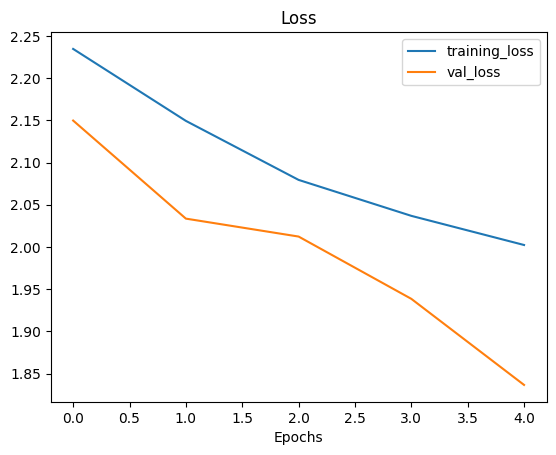

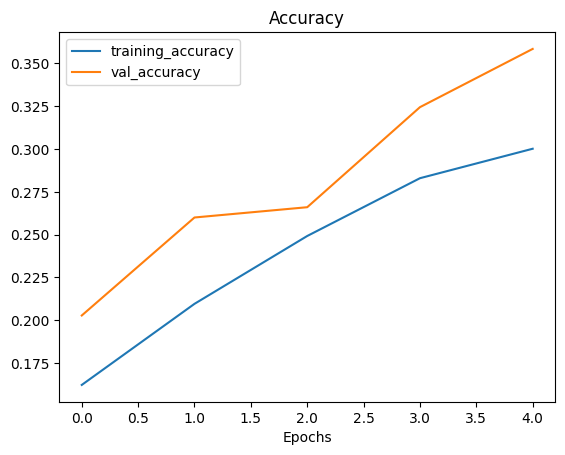

In [107]:
# Check loss curve
plot_loss_curve(history_11)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they are heading in the right direction (certainly not the wrong direction). So if we train for longer, we might see further improvements

## 7. Repeat untill satisfied

We could keep going... continually trying to bring our loss curves closer to each other and trying to improve validation/test accuracy.

**How?**

By running lots of experiments, namely:
* restructuring our model's architecture (increasing layers/hidden units)
* adjust the learning rate
* Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance).
* Try training for longer (e.g. 10 or 20 epochs instead of 5)
* Try **transfer learning**

### Making prediction with our trained model

In [108]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [118]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


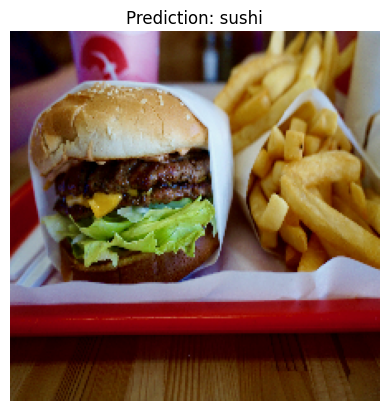

In [120]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


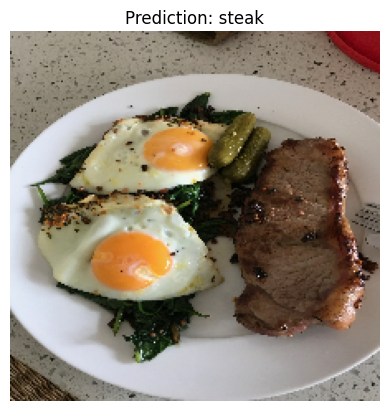

In [121]:
pred_and_plot(model_11, "03-steak.jpeg", class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


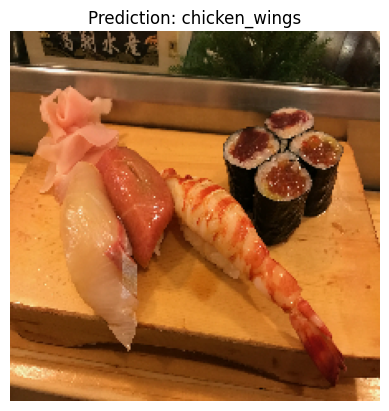

In [122]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


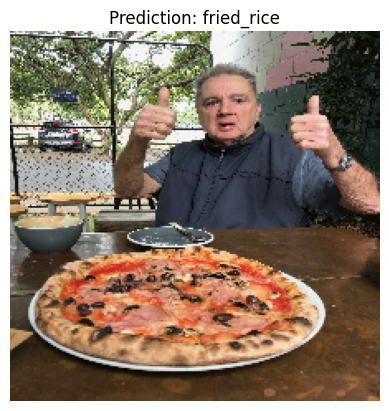

In [123]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


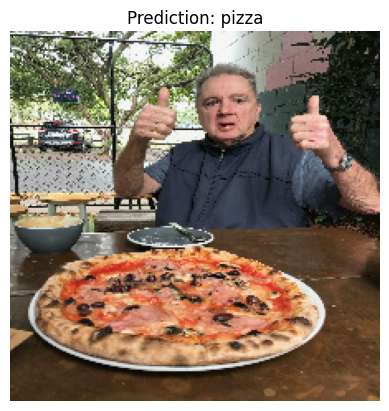

In [125]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names=["pizza", "steak"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


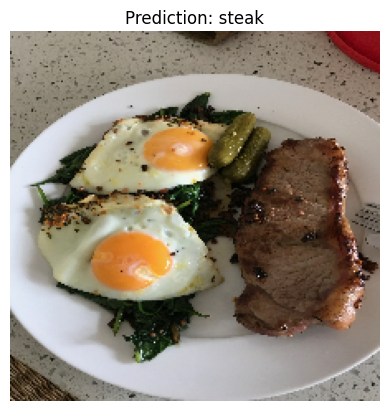

In [131]:
pred_and_plot(model_5, "03-steak.jpeg", class_names=["pizza", "steak"])

## Saving and loading our model

In [134]:
# Save the model
model_11.save("model_11.h5")

In [135]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("model_11.h5")
loaded_model_11.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 77s 959ms/step - accuracy: 0.3381 - loss: 1.8620


[1.8365095853805542, 0.35839998722076416]

In [136]:
# Compare our loaded model to oour existing model
model_11.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 775ms/step - accuracy: 0.3622 - loss: 1.8469


[1.8365098237991333, 0.35839998722076416]